<a href="https://colab.research.google.com/github/akashkumar181/Kidney_Disease_Prediction__System/blob/main/Kidney_Disease_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kidney Disease Prediction System**



In [11]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:

# Step 2: Load the Dataset
df = pd.read_csv("/content/newml.csv")
df.replace("?", np.nan, inplace=True)


In [13]:
# Step 3: Convert specific columns to numeric
cols_to_numeric = ['Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [14]:

# Step 4: Handle Missing Values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].astype(float)
        df[col] = df[col].fillna(df[col].mean())

In [15]:

# Step 5: Encode Categorical Features
if df['Class'].dtype == 'object':
    df['Class'] = df['Class'].map({'ckd': 1, 'notckd': 0})

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
# Step 6: Feature Selection (Added More Features)
features = ['Age', 'Blood Pressure', 'Blood Urea', 'Sodium', 'Hemoglobin',
            'Packed Cell Volume', 'Albumin', 'Sugar', 'Serum Creatinine',
            'Specific Gravity', 'Red Blood Cells', 'Red Blood Cell Count',
            'White Blood Cell Count', 'Hypertension', 'Diabetes Mellitus',
            'Appetite', 'Pedal Edema', 'Anemia']
X = df[features]
y = df['Class']

In [17]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:

# Step 9: Random Forest Model
model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)


===== Model Evaluation =====
Accuracy: 0.9125

Confusion Matrix:
 [[123  13]
 [  8  96]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       136
         1.0       0.88      0.92      0.90       104

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



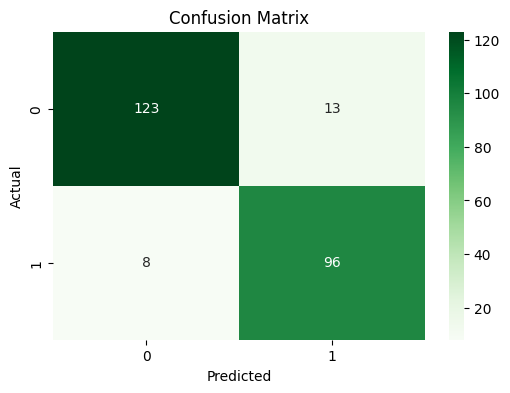

In [20]:
# Step 10: Evaluation
y_pred = model.predict(X_test)

print("\n===== Model Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


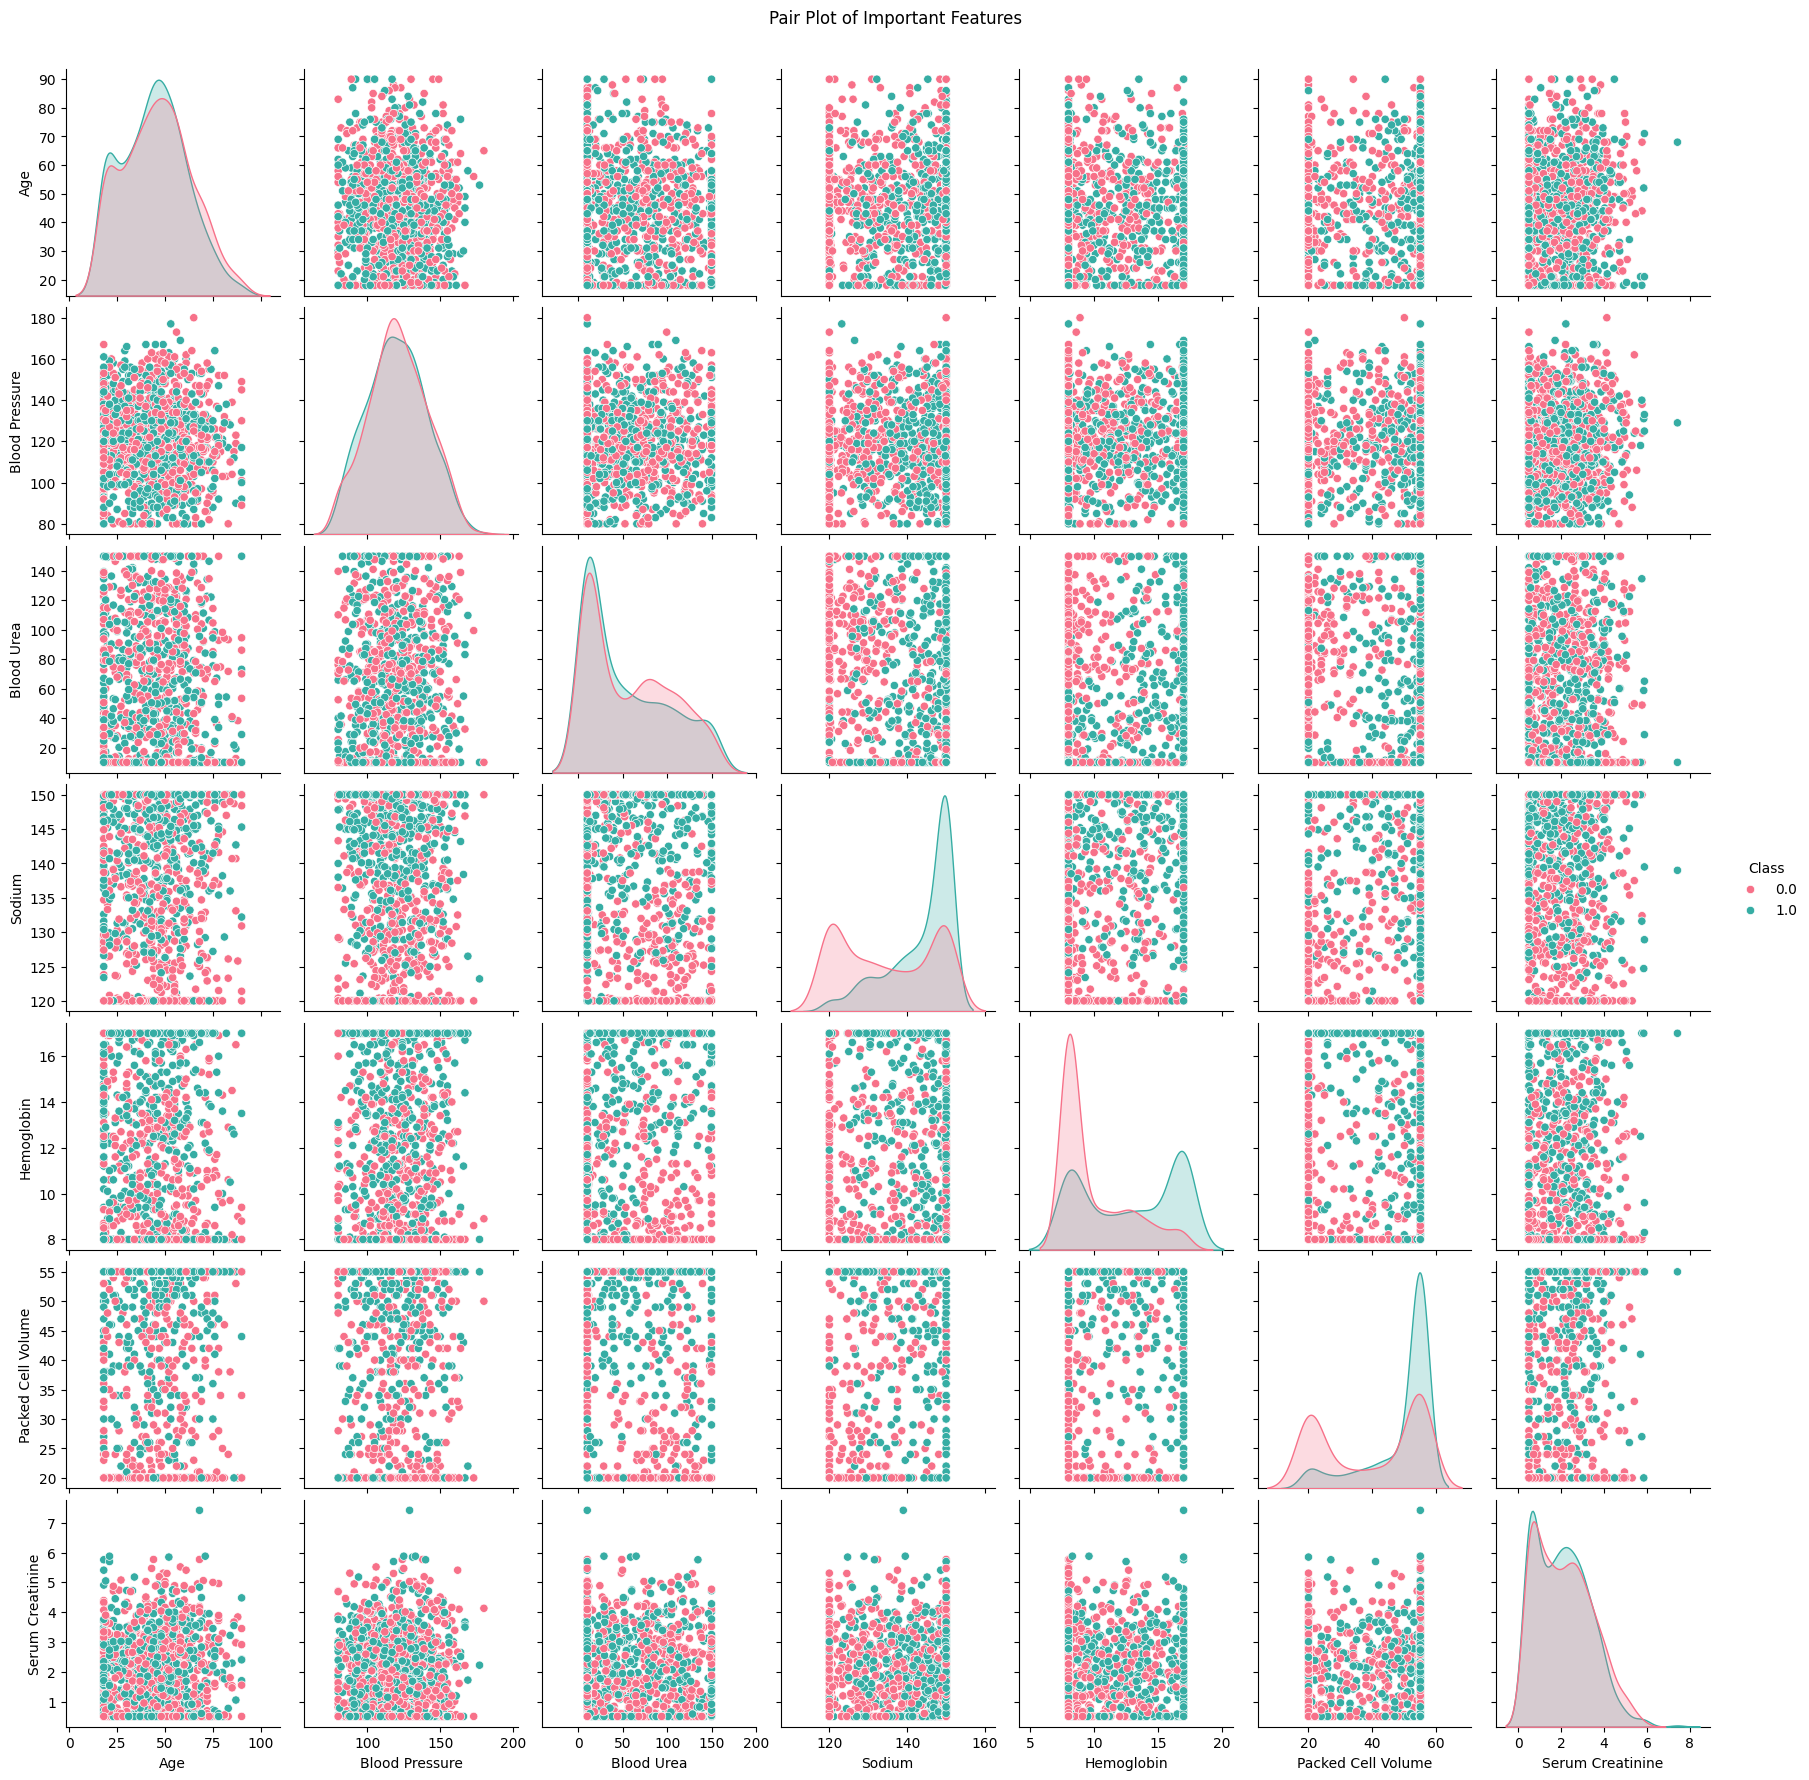

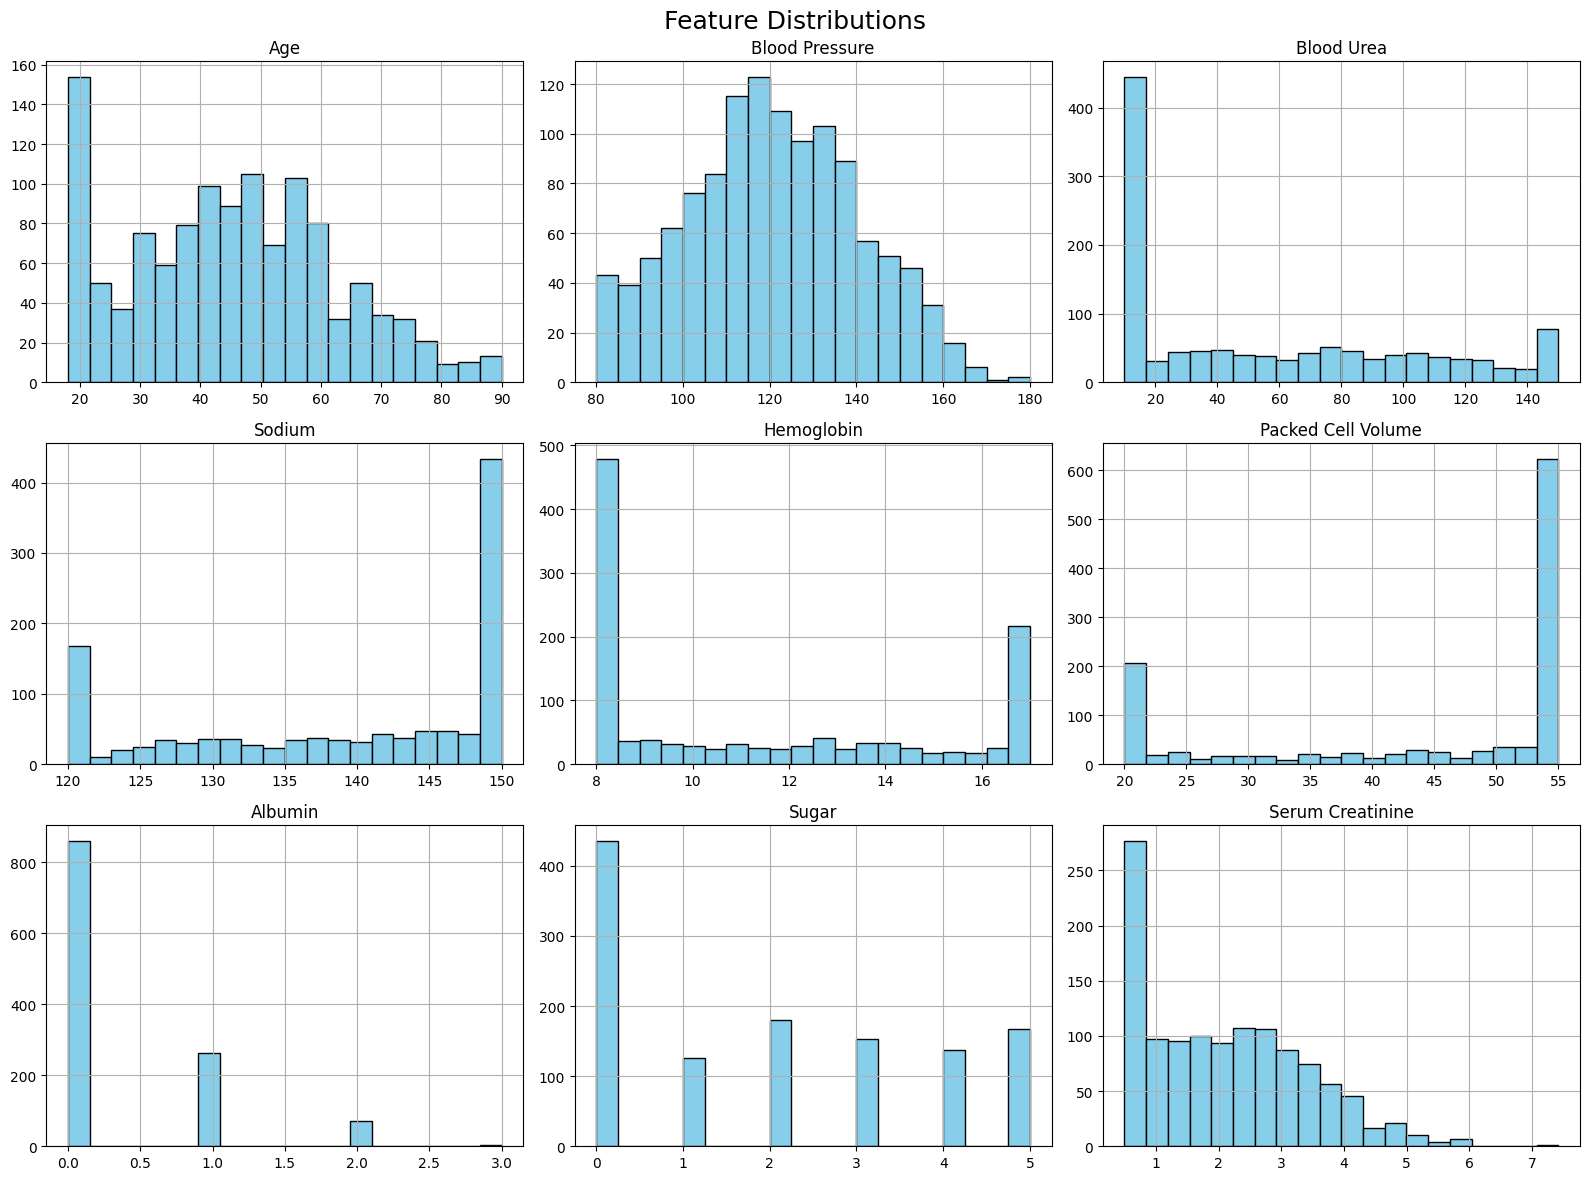

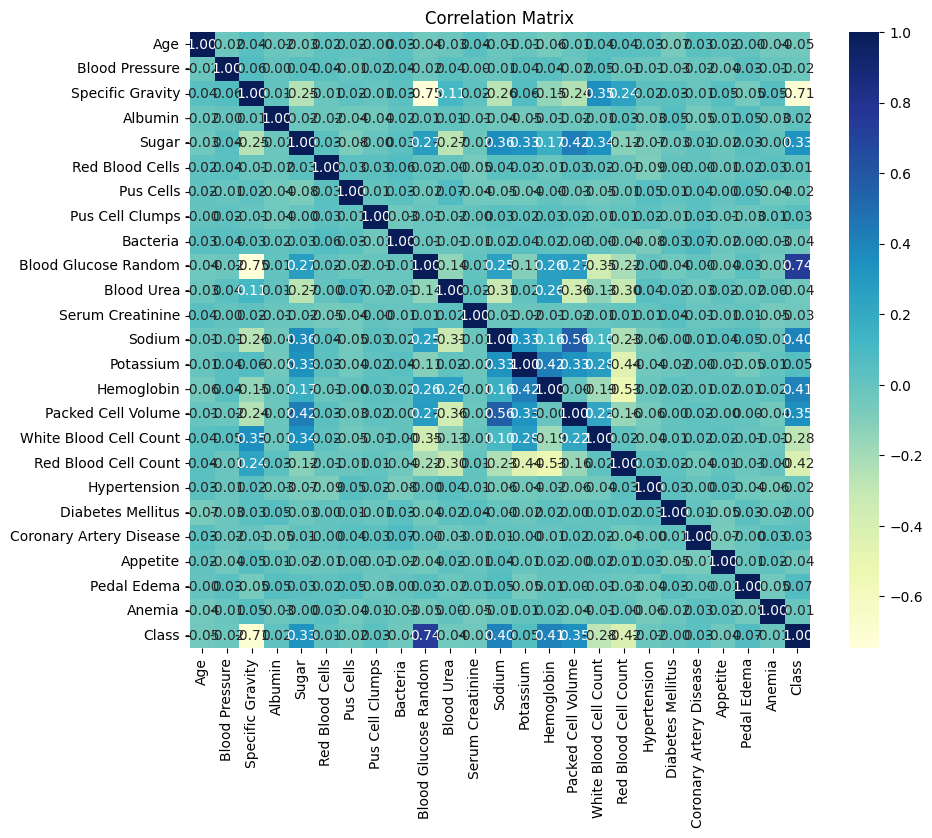

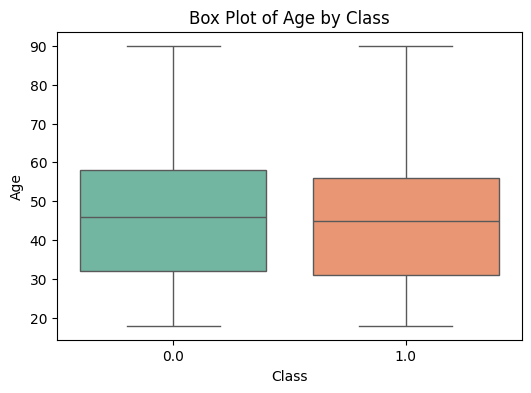

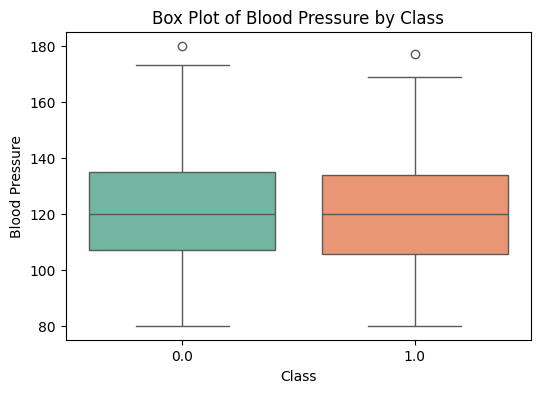

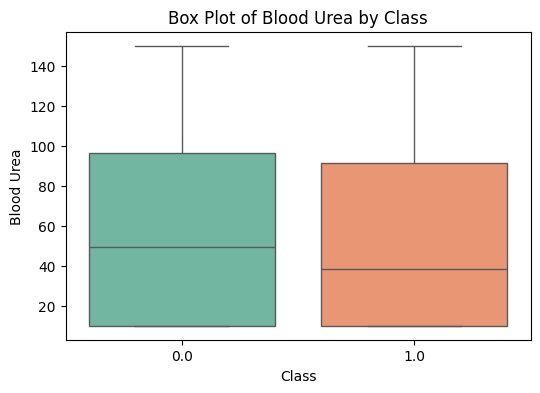

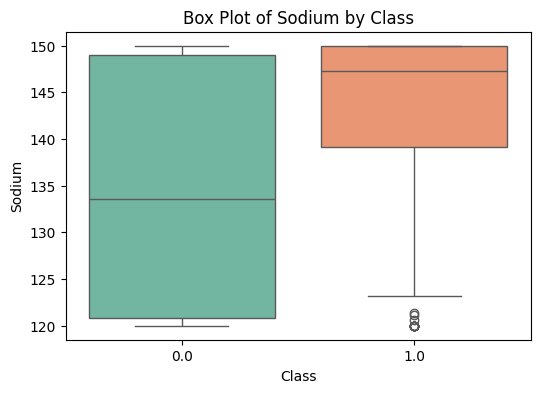

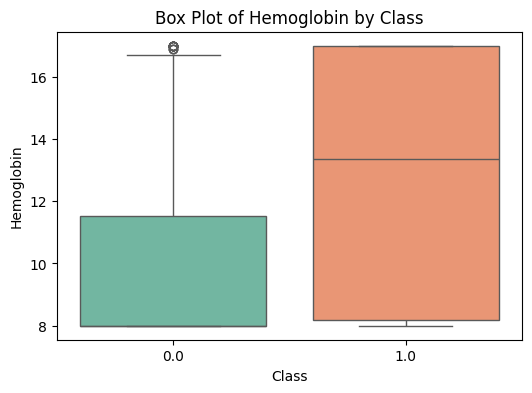

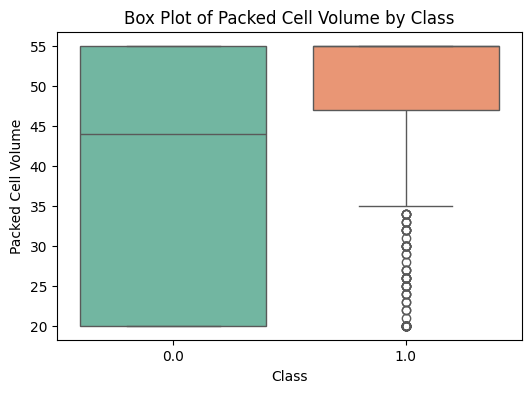

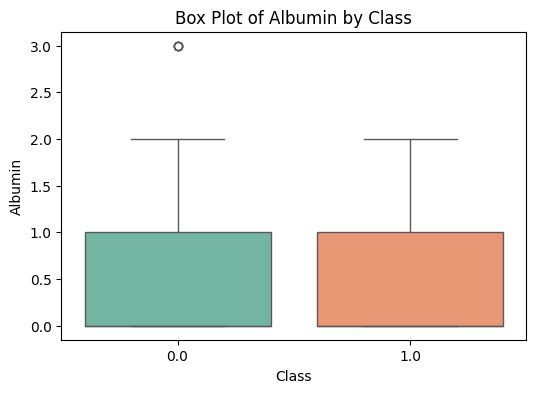

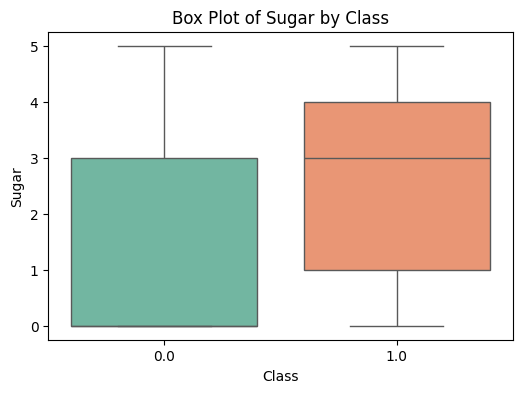

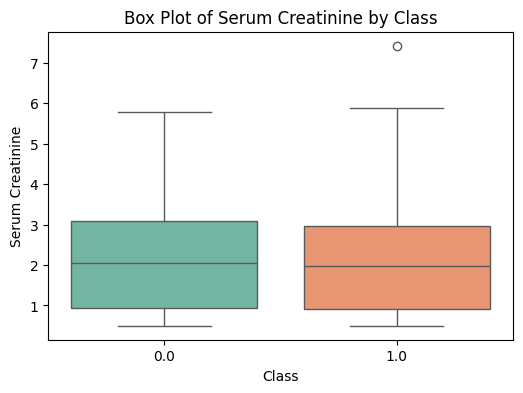

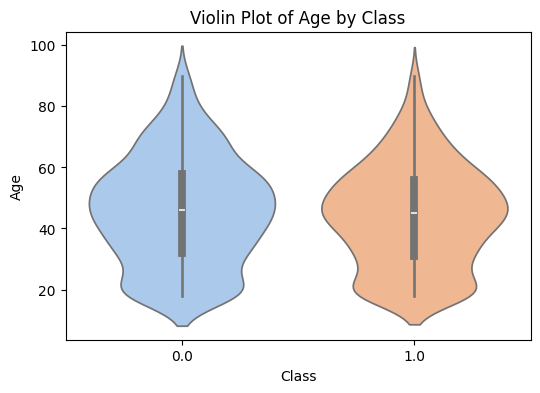

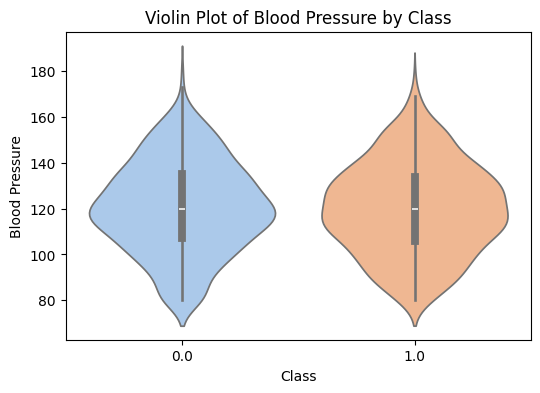

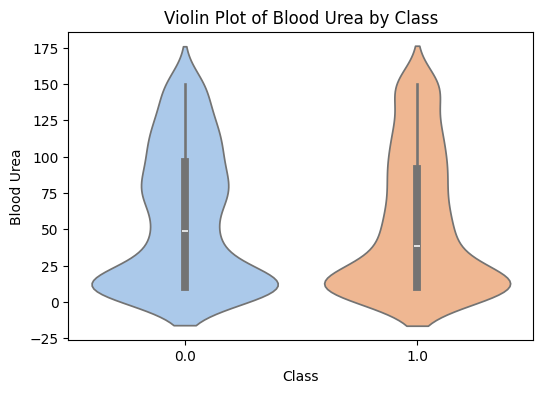

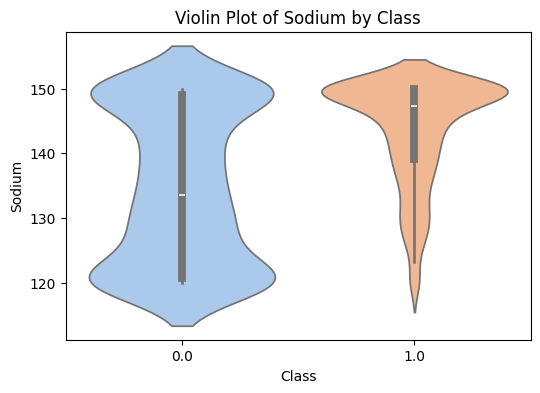

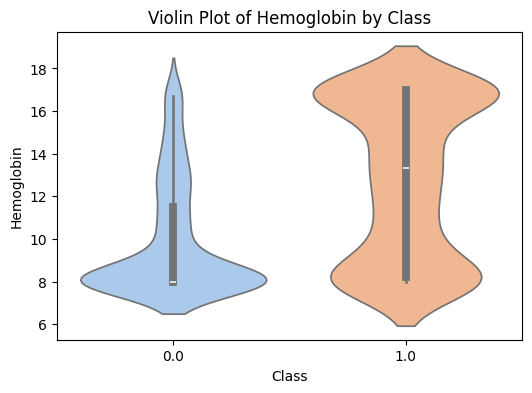

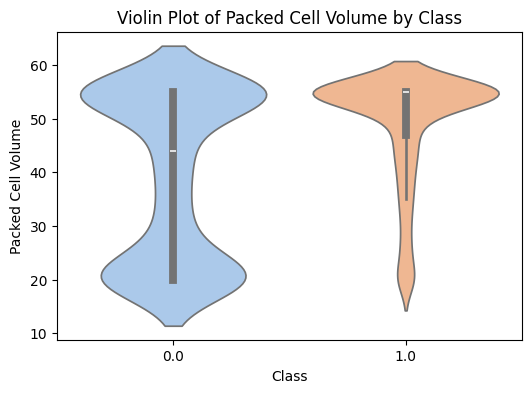

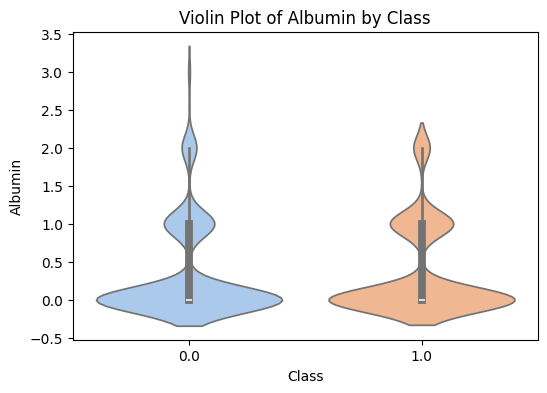

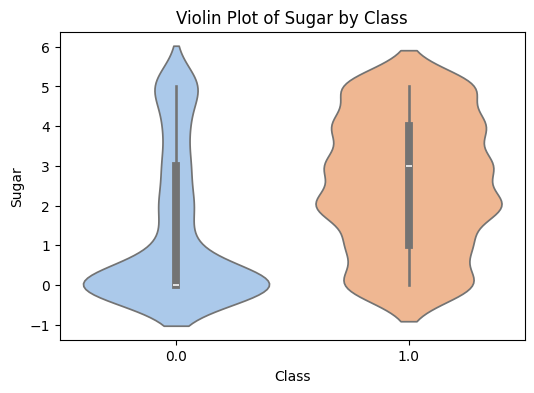

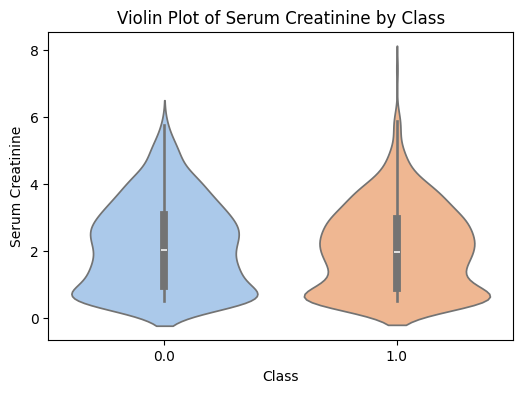

In [21]:
# Step 11: Visual EDA — Pair Plot
selected_features_for_pair = ['Age', 'Blood Pressure', 'Blood Urea', 'Sodium',
                              'Hemoglobin', 'Packed Cell Volume', 'Serum Creatinine', 'Class']
sns.pairplot(df[selected_features_for_pair], hue='Class', palette='husl')
plt.suptitle("Pair Plot of Important Features", y=1.02)
plt.show()

# Feature Distribution
important_cols = ['Age', 'Blood Pressure', 'Blood Urea', 'Sodium', 'Hemoglobin',
                  'Packed Cell Volume', 'Albumin', 'Sugar', 'Serum Creatinine']
df[important_cols].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Box Plots
for col in important_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df, hue='Class', palette='Set2', legend=False)
    plt.title(f"Box Plot of {col} by Class")
    plt.show()

# Violin Plots
for col in important_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Class', y=col, data=df, hue='Class', palette='pastel', legend=False)
    plt.title(f"Violin Plot of {col} by Class")
    plt.show()

In [22]:
# Step 12: User Input for Live Prediction
print("\nPlease enter the following medical values for CKD prediction:")

user_input = []
prompts = {
    'Age': "Enter your age in years: ",
    'Blood Pressure': "Enter your blood pressure (in mmHg): ",
    'Blood Urea': "Enter your blood urea level (in mg/dL): ",
    'Sodium': "Enter your sodium level (in mEq/L): ",
    'Hemoglobin': "Enter your hemoglobin level (in g/dL): ",
    'Packed Cell Volume': "Enter your packed cell volume: ",
    'Albumin': "Enter albumin value (0-5 scale): ",
    'Sugar': "Enter sugar value (0-5 scale): ",
    'Serum Creatinine': "Enter serum creatinine (in mg/dL): ",
    'Specific Gravity': "Enter specific gravity (e.g., 1.020): ",
    'Red Blood Cells': "Enter red blood cells (0 for abnormal, 1 for normal): ",
    'Red Blood Cell Count': "Enter red blood cell count (million cells/cu mm): ",
    'White Blood Cell Count': "Enter white blood cell count (cells/cu mm): ",
    'Hypertension': "Do you have hypertension? (0 = No, 1 = Yes): ",
    'Diabetes Mellitus': "Do you have diabetes mellitus? (0 = No, 1 = Yes): ",
    'Appetite': "Enter appetite (0 for poor, 1 for good): ",
    'Pedal Edema': "Do you have pedal edema? (0 = No, 1 = Yes): ",
    'Anemia': "Do you have anemia? (0 = No, 1 = Yes): "
}

# Collect input from the user
for feature in features:
    while True:
        try:
            val = float(input(prompts[feature]))
            user_input.append(val)
            break
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Convert and scale input
user_df = pd.DataFrame([user_input], columns=features)
user_scaled = scaler.transform(user_df)

# Predict probability
probabilities = model.predict_proba(user_scaled)[0]
ckd_prob = probabilities[1] * 100
not_ckd_prob = probabilities[0] * 100

# Threshold decision
threshold = 50.0
result = "a Chronic Kidney Disease patient" if ckd_prob >= threshold else "Not a Chronic Kidney Disease patient"

# Output result
print("\n Prediction Result: You are likely", result)
print("Probability of CKD: {:.2f}%".format(ckd_prob))
print("Probability of Not CKD: {:.2f}%".format(not_ckd_prob))


Please enter the following medical values for CKD prediction:
Enter your age in years: 68
Enter your blood pressure (in mmHg): 160
Enter your blood urea level (in mg/dL): 110
Enter your sodium level (in mEq/L): 130
Enter your hemoglobin level (in g/dL): 9.5
Enter your packed cell volume: 30
Enter albumin value (0-5 scale): 3
Enter sugar value (0-5 scale): 0
Enter serum creatinine (in mg/dL): 6.2
Enter specific gravity (e.g., 1.020): 1.010
Enter red blood cells (0 for abnormal, 1 for normal): 0
Enter red blood cell count (million cells/cu mm): 3.5
Enter white blood cell count (cells/cu mm): 10500
Do you have hypertension? (0 = No, 1 = Yes): 1
Do you have diabetes mellitus? (0 = No, 1 = Yes): 1
Enter appetite (0 for poor, 1 for good): 0
Do you have pedal edema? (0 = No, 1 = Yes): 1
Do you have anemia? (0 = No, 1 = Yes): 1

 Prediction Result: You are likely a Chronic Kidney Disease patient
Probability of CKD: 62.67%
Probability of Not CKD: 37.33%
